# **TUGAS BESAR BIOINFORMATIKA**

Kelompok 10 RB:

1. Kiwit Novitasari_121450126
2. Syifa Firnanda_121450094
3. Audrey Ribka_121450103
4. Yunaena Maratul Kirom_121450080
5. Tarisah_121450141
6. Khalda Luthfi A_121450160


# **01 - Prep Environtment and Dataset**

## 1.1 Instalasi

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2024-12-24 03:37:32--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-12-24 03:37:33--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.08s   

2024-12-24 03:37:35 (313 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-12-24 03:37:35--  https://gi

In [ ]:
! pip install chembl_webresource_client
! pip install lazypredict
! pip install jcopml==1.1.1
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.1.1-py2.py3-none-any.whl size=27509 sha256=5ef5b0bd2c83b1c1840bb235e3acbd2cdf2f79114a946255b34492055356c26e
  Stored in directory: /root/.cache/pip/wheels/79/3f/d2/72357060b29488def73bceb49f653ca88a60a3ddac63cf7780
Successfully built jcopml
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 58.3 MB/s eta 0:00:00


## 1.2 Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chembl_webresource_client.new_client import new_client
# from jcopml.plot import plot_missing_value

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Descriptors, Lipinski

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier

from tqdm import tqdm

# from jcopml.pipeline import num_pipe, cat_pipe
# from jcopml.utils import save_model, load_model
# from jcopml.plot import plot_missing_value
# from jcopml.feature_importance import mean_score_decrease


## 1.3 Pencarian Database Berdasarkan Kata Kunci Reseptor/Target

In [ ]:
target = new_client.target
target_query = target.search('Transforming Growth Factor-beta Receptor')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Transforming growth factor beta,36.00,False,CHEMBL3988637,"[{'accession': 'P01137', 'component_descriptio...",PROTEIN FAMILY,9606.00
1,[],Homo sapiens,Transforming growth factor beta-1,34.00,False,CHEMBL1795178,"[{'accession': 'P01137', 'component_descriptio...",SINGLE PROTEIN,9606.00
2,[],Homo sapiens,Transforming growth factor beta-3,34.00,False,CHEMBL3712903,"[{'accession': 'P10600', 'component_descriptio...",SINGLE PROTEIN,9606.00
3,[],Mus musculus,Transforming growth factor beta-1 proprotein,34.00,False,CHEMBL4295696,"[{'accession': 'P04202', 'component_descriptio...",SINGLE PROTEIN,10090.00
4,[],Homo sapiens,Transforming growth factor beta-2,32.00,False,CHEMBL3217393,"[{'accession': 'P61812', 'component_descriptio...",SINGLE PROTEIN,9606.00
...,...,...,...,...,...,...,...,...,...
4259,[],Homo sapiens,VHL/Tyrosine-protein kinase Lck,0.00,False,CHEMBL4523727,"[{'accession': 'P06239', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.00
4260,[],Homo sapiens,VHL/Tyrosine-protein kinase Yes,0.00,False,CHEMBL4523728,"[{'accession': 'P07947', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.00
4261,[],Homo sapiens,VHL/SRC,0.00,False,CHEMBL4523733,"[{'accession': 'P12931', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.00
4262,[],Homo sapiens,Src/Lck kinase,0.00,False,CHEMBL4523978,"[{'accession': 'P12931', 'component_descriptio...",SELECTIVITY GROUP,9606.00


In [ ]:
# periksa target yang tersedia
targets[['target_chembl_id', 'pref_name', 'organism']]

,target_chembl_id,pref_name,organism
0,CHEMBL3988637,Transforming growth factor beta,Homo sapiens
1,CHEMBL1795178,Transforming growth factor beta-1,Homo sapiens
2,CHEMBL3712903,Transforming growth factor beta-3,Homo sapiens
3,CHEMBL4295696,Transforming growth factor beta-1 proprotein,Mus musculus
4,CHEMBL3217393,Transforming growth factor beta-2,Homo sapiens
...,...,...,...
4259,CHEMBL4523727,VHL/Tyrosine-protein kinase Lck,Homo sapiens
4260,CHEMBL4523728,VHL/Tyrosine-protein kinase Yes,Homo sapiens
4261,CHEMBL4523733,VHL/SRC,Homo sapiens
4262,CHEMBL4523978,Src/Lck kinase,Homo sapiens


## 1.4 Data Preprocessing

### Filter berdasarkan IC50

In [ ]:
def targetFilter(target_chembl_id):
    activity = new_client.activity
    res = activity.filter(target_chembl_id=target_chembl_id).filter(standard_type="IC50")
    df = pd.DataFrame.from_dict(res)
    return df


looping semua target dan unduh data

In [ ]:
dataframes = []

# Membatasi iterasi hanya pada 30 ID pertama
limited_targets = targets.head(30)

for index, row in limited_targets.iterrows():
    try:
        # Menampilkan pesan untuk target yang sedang diproses
        print(f"Retrieving data for target: {row['target_chembl_id']} ({row['pref_name']})")

        # Mendapatkan data menggunakan targetFilter dengan target_chembl_id
        df = targetFilter(row['target_chembl_id'])

        # Memeriksa apakah dataframe tidak kosong
        if not df.empty:
            dataframes.append(df)

    except Exception as e:
        # Menangani error jika data tidak dapat diambil
        print(f"Failed to retrieve data for target: {row['target_chembl_id']}. Error: {e}")


Retrieving data for target: CHEMBL3988637 (Transforming growth factor beta)
Retrieving data for target: CHEMBL1795178 (Transforming growth factor beta-1)
Retrieving data for target: CHEMBL3712903 (Transforming growth factor beta-3)
Retrieving data for target: CHEMBL4295696 (Transforming growth factor beta-1 proprotein)
Retrieving data for target: CHEMBL3217393 (Transforming growth factor beta-2)
Retrieving data for target: CHEMBL2021750 (TGF-beta receptor type-1)
Retrieving data for target: CHEMBL4267 (TGF-beta receptor type II)
Retrieving data for target: CHEMBL4296078 (Transforming growth factor beta-1 proprotein/Mothers against decapentaplegic homolog 3)
Retrieving data for target: CHEMBL4523665 (Transforming growth factor beta-1 proprotein/Smad3)
Retrieving data for target: CHEMBL3407312 (Krueppel-like factor 10)
Retrieving data for target: CHEMBL4523155 (Krueppel-like factor 10)
Retrieving data for target: CHEMBL4523265 (TGF-beta receptor type-1)
Retrieving data for target: CHEMBL

Menggabungkan semua data menjadi satu dataframe

In [ ]:
# Gabungkan semua dataframe menjadi satu
df = pd.concat(dataframes, ignore_index=True)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24410712,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5046083,Inhibition of TGF beta 1 (unknown origin) expr...,B,None,None,BAO_0000190,...,Homo sapiens,Transforming growth factor beta-1,9606,None,None,IC50,uM,UO_0000065,None,6.7
1,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24410713,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5046083,Inhibition of TGF beta 1 (unknown origin) expr...,B,None,None,BAO_0000190,...,Homo sapiens,Transforming growth factor beta-1,9606,None,None,IC50,uM,UO_0000065,None,1.6
2,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25030322,[],CHEMBL5241488,Inhibition of TGF-beta receptor (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Transforming growth factor beta-1,9606,None,None,IC50,nM,UO_0000065,None,12.9
3,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25030323,[],CHEMBL5241488,Inhibition of TGF-beta receptor (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Transforming growth factor beta-1,9606,None,None,IC50,nM,UO_0000065,None,56.0
4,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25030324,[],CHEMBL5241488,Inhibition of TGF-beta receptor (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Transforming growth factor beta-1,9606,None,None,IC50,nM,UO_0000065,None,38.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,None,None,10905902,[],CHEMBL2038875,Inhibition of Tel-fused IGF1R in mouse BA/F3 c...,B,None,None,BAO_0000190,...,Mus musculus,Insulin-like growth factor 1 receptor,10090,None,None,IC50,uM,UO_0000065,None,1.5
8723,None,None,10905949,[],CHEMBL2038875,Inhibition of Tel-fused IGF1R in mouse BA/F3 c...,B,None,None,BAO_0000190,...,Mus musculus,Insulin-like growth factor 1 receptor,10090,None,None,IC50,uM,UO_0000065,None,10.0
8724,None,None,10906027,[],CHEMBL2038875,Inhibition of Tel-fused IGF1R in mouse BA/F3 c...,B,None,None,BAO_0000190,...,Mus musculus,Insulin-like growth factor 1 receptor,10090,None,None,IC50,uM,UO_0000065,None,5.7
8725,None,None,10906060,[],CHEMBL2038875,Inhibition of Tel-fused IGF1R in mouse BA/F3 c...,B,None,None,BAO_0000190,...,Mus musculus,Insulin-like growth factor 1 receptor,10090,None,None,IC50,uM,UO_0000065,None,6.2


In [ ]:
df.to_csv('00_30id-TGF-beta_receptor.csv', index=False)

### Menghapus data yang hilang dan duplikat

In [ ]:
df = pd.read_csv('00_30id-TGF-beta_receptor.csv')

In [ ]:
df_value = df[df.standard_value.notna()]
df_smile = df_value[df_value.canonical_smiles.notna()]
df_nr = df_smile.drop_duplicates(['canonical_smiles'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_value(df):
  plt.figure(figsize=(12, 6))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
  plt.title('Visualisasi Missing Values', fontsize=16, fontweight='bold')
  plt.xlabel('kolom', fontsize=12, fontweight='bold')
  plt.ylabel('baris', fontsize=12, fontweight='bold')
  plt.show()

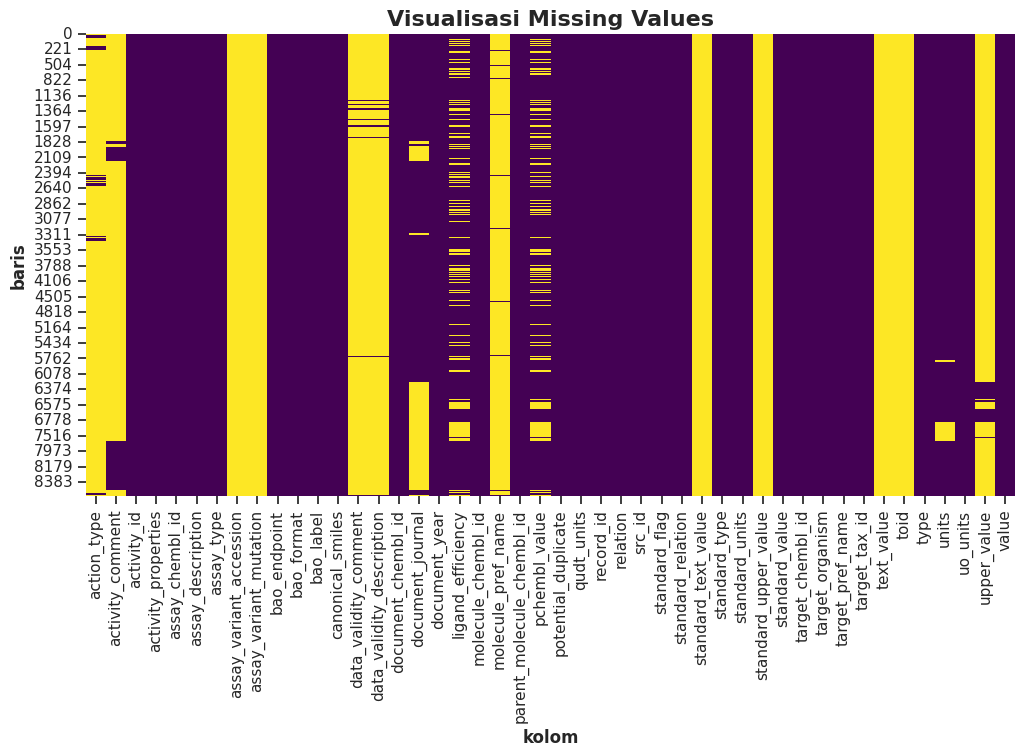

In [ ]:
plot_missing_value(df_nr)

### Menyeleksi hanya 3 kolom

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df_prep = df_nr[selection]

In [ ]:
df_prep

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4448117,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@...,6700.00
1,CHEMBL5078185,CC[C@@H](C)[C@@H](NC(=O)[C@@H](CCCNC(=N)N)NC(=...,1600.00
2,CHEMBL3260567,Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1,12.90
3,CHEMBL5272606,Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CC...,56.00
4,CHEMBL5280211,CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn...,38.20
...,...,...,...
8636,CHEMBL5404411,COc1ccc(Cc2nnc(N3CCN(C(=O)c4ccccc4)CC3)c3ccccc...,1532.00
8688,CHEMBL2165191,Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)c...,258000.00
8690,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,10000.00
8691,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,10000.00


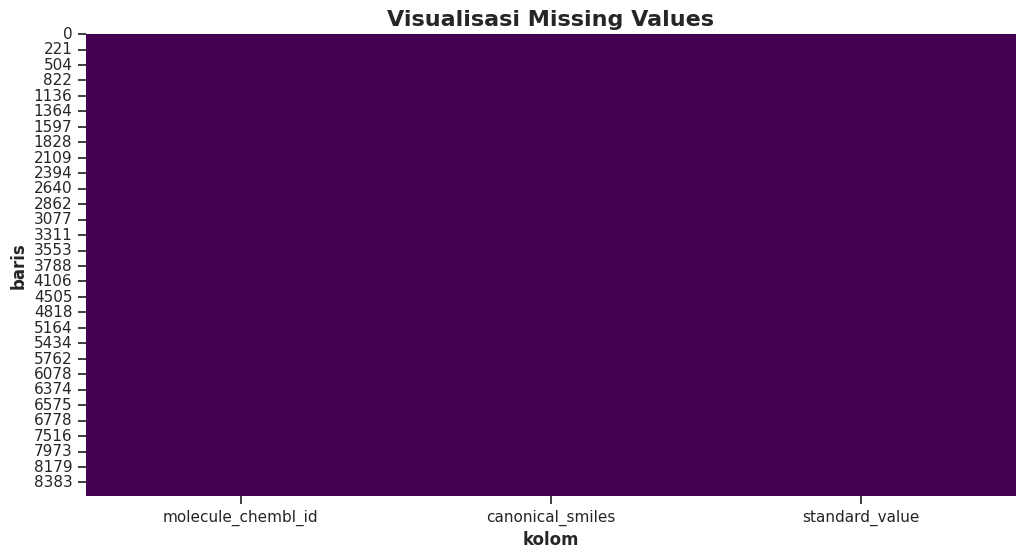

In [ ]:
plot_missing_value(df_prep)

In [ ]:
df_prep.isna().sum()

,0
molecule_chembl_id,0
canonical_smiles,0
standard_value,0


In [ ]:
df_prep

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4448117,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@...,6700.00
1,CHEMBL5078185,CC[C@@H](C)[C@@H](NC(=O)[C@@H](CCCNC(=N)N)NC(=...,1600.00
2,CHEMBL3260567,Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1,12.90
3,CHEMBL5272606,Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CC...,56.00
4,CHEMBL5280211,CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn...,38.20
...,...,...,...
8636,CHEMBL5404411,COc1ccc(Cc2nnc(N3CCN(C(=O)c4ccccc4)CC3)c3ccccc...,1532.00
8688,CHEMBL2165191,Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)c...,258000.00
8690,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,10000.00
8691,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,10000.00


In [ ]:
df_prep.to_csv('00_dataset_prep_TGF-beta.csv', index=False)

### Memberi label pada data

In [ ]:
df_prep_label = pd.read_csv('00_dataset_prep_TGF-beta.csv')

In [ ]:
df_prep_label

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4448117,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@...,6700.00
1,CHEMBL5078185,CC[C@@H](C)[C@@H](NC(=O)[C@@H](CCCNC(=N)N)NC(=...,1600.00
2,CHEMBL3260567,Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1,12.90
3,CHEMBL5272606,Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CC...,56.00
4,CHEMBL5280211,CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn...,38.20
...,...,...,...
6001,CHEMBL5404411,COc1ccc(Cc2nnc(N3CCN(C(=O)c4ccccc4)CC3)c3ccccc...,1532.00
6002,CHEMBL2165191,Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)c...,258000.00
6003,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,10000.00
6004,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,10000.00


In [ ]:
bioactivity_threshold = []
for i in df_prep_label.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')

In [ ]:
bioactivity_class = pd.DataFrame(bioactivity_class)
bioactivity_class

,class
0,intermediate
1,intermediate
2,active
3,active
4,active
...,...
6001,intermediate
6002,inactive
6003,inactive
6004,inactive


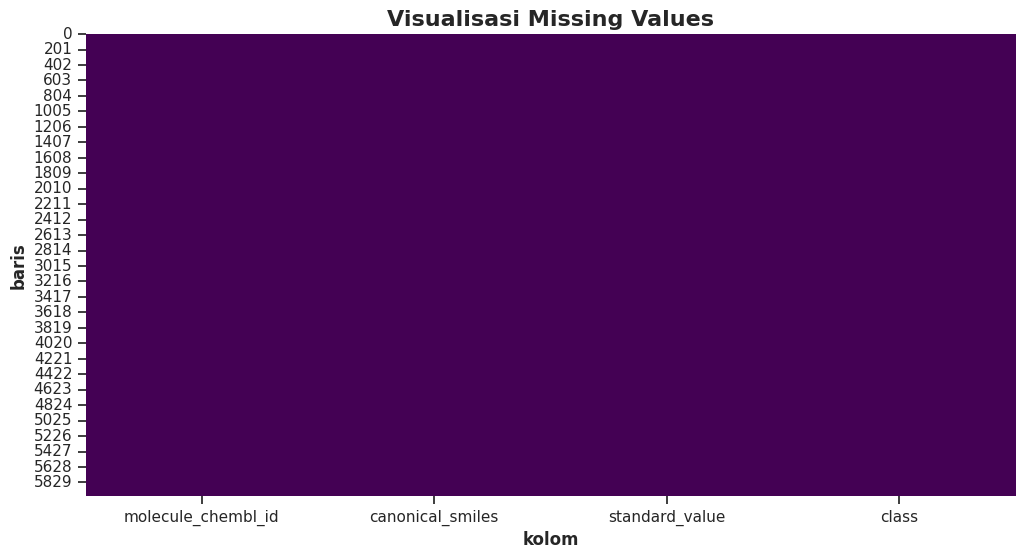

In [ ]:
df_label = pd.concat([df_prep_label, bioactivity_class],axis=1)
plot_missing_value(df_label)

### Export dataset

In [ ]:
df_label.to_csv('01_label_TGF-beta.csv', index=False)

In [ ]:
! zip '01_prep_TGF-beta_30id.csv'.zip *.csv

  adding: 00_25id-TGF-beta_receptor.csv (deflated 92%)
  adding: 00_30id-TGF-beta_receptor.csv (deflated 93%)
  adding: 00_dataset_prep_TGF-beta.csv (deflated 82%)
  adding: 01_label_TGF-beta.csv (deflated 84%)


### Transform SMILES menjadi LIST

In [ ]:
df_eda = pd.read_csv('01_label_TGF-beta.csv')
df_eda

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4448117,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@...,6700.00,intermediate
1,CHEMBL5078185,CC[C@@H](C)[C@@H](NC(=O)[C@@H](CCCNC(=N)N)NC(=...,1600.00,intermediate
2,CHEMBL3260567,Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1,12.90,active
3,CHEMBL5272606,Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CC...,56.00,active
4,CHEMBL5280211,CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn...,38.20,active
...,...,...,...,...
6001,CHEMBL5404411,COc1ccc(Cc2nnc(N3CCN(C(=O)c4ccccc4)CC3)c3ccccc...,1532.00,intermediate
6002,CHEMBL2165191,Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)c...,258000.00,inactive
6003,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,10000.00,inactive
6004,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,10000.00,inactive


In [ ]:
df_eda = df_label
df_eda

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4448117,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@...,6700.00,intermediate
1,CHEMBL5078185,CC[C@@H](C)[C@@H](NC(=O)[C@@H](CCCNC(=N)N)NC(=...,1600.00,intermediate
2,CHEMBL3260567,Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1,12.90,active
3,CHEMBL5272606,Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CC...,56.00,active
4,CHEMBL5280211,CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn...,38.20,active
...,...,...,...,...
6001,CHEMBL5404411,COc1ccc(Cc2nnc(N3CCN(C(=O)c4ccccc4)CC3)c3ccccc...,1532.00,intermediate
6002,CHEMBL2165191,Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)c...,258000.00,inactive
6003,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,10000.00,inactive
6004,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,10000.00,inactive


In [ ]:
df_no_smiles = df_eda.drop(columns='canonical_smiles')
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL4448117,6700.00,intermediate
1,CHEMBL5078185,1600.00,intermediate
2,CHEMBL3260567,12.90,active
3,CHEMBL5272606,56.00,active
4,CHEMBL5280211,38.20,active
...,...,...,...
6001,CHEMBL5404411,1532.00,intermediate
6002,CHEMBL2165191,258000.00,inactive
6003,CHEMBL1852688,10000.00,inactive
6004,CHEMBL3643413,10000.00,inactive


In [ ]:
smiles = []

for i in df_eda.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL4448117,6700.00,intermediate,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@...
1,CHEMBL5078185,1600.00,intermediate,CC[C@@H](C)[C@@H](NC(=O)[C@@H](CCCNC(=N)N)NC(=...
2,CHEMBL3260567,12.90,active,Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1
3,CHEMBL5272606,56.00,active,Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CC...
4,CHEMBL5280211,38.20,active,CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn...
...,...,...,...,...
6001,CHEMBL5404411,1532.00,intermediate,COc1ccc(Cc2nnc(N3CCN(C(=O)c4ccccc4)CC3)c3ccccc...
6002,CHEMBL2165191,258000.00,inactive,Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)c...
6003,CHEMBL1852688,10000.00,inactive,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...
6004,CHEMBL3643413,10000.00,inactive,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...


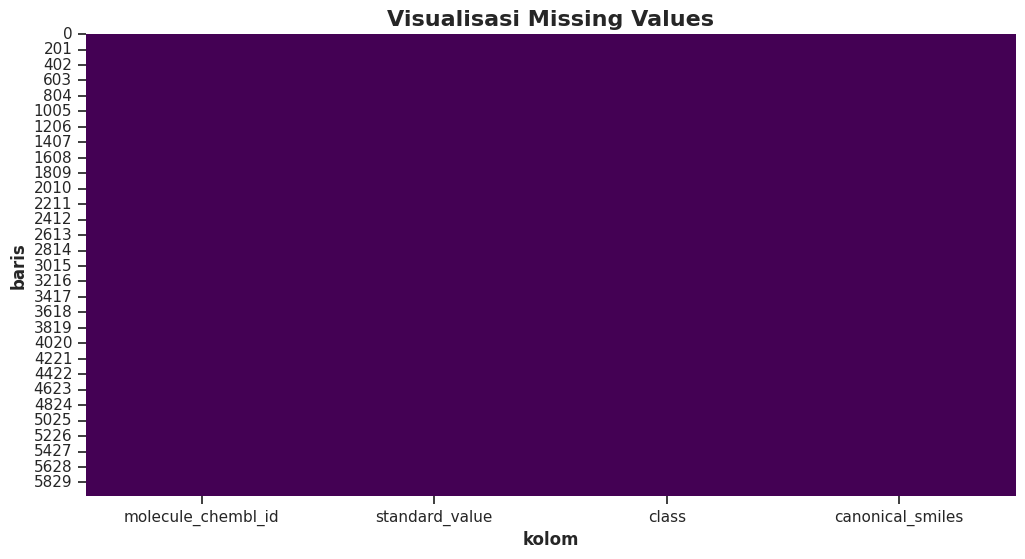

In [ ]:
plot_missing_value(df_clean_smiles)

### Menghitung Lipinski Deskriptor

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,2253.82,1.58,31.00,24.00
1,2350.99,1.85,35.00,24.00
2,399.43,4.24,2.00,6.00
3,369.43,3.51,1.00,5.00
4,433.56,5.74,1.00,7.00
...,...,...,...,...
6001,438.53,4.19,0.00,5.00
6002,408.46,2.71,2.00,7.00
6003,560.49,5.35,2.00,8.00
6004,450.47,2.88,1.00,7.00


### Menggabungkan antara dataset dengan deskriptor lipinski

In [ ]:
df_combined = pd.concat([df_clean_smiles,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4448117,6700.00,intermediate,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@...,2253.82,1.58,31.00,24.00
1,CHEMBL5078185,1600.00,intermediate,CC[C@@H](C)[C@@H](NC(=O)[C@@H](CCCNC(=N)N)NC(=...,2350.99,1.85,35.00,24.00
2,CHEMBL3260567,12.90,active,Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1,399.43,4.24,2.00,6.00
3,CHEMBL5272606,56.00,active,Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CC...,369.43,3.51,1.00,5.00
4,CHEMBL5280211,38.20,active,CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn...,433.56,5.74,1.00,7.00
...,...,...,...,...,...,...,...,...
6001,CHEMBL5404411,1532.00,intermediate,COc1ccc(Cc2nnc(N3CCN(C(=O)c4ccccc4)CC3)c3ccccc...,438.53,4.19,0.00,5.00
6002,CHEMBL2165191,258000.00,inactive,Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)c...,408.46,2.71,2.00,7.00
6003,CHEMBL1852688,10000.00,inactive,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,560.49,5.35,2.00,8.00
6004,CHEMBL3643413,10000.00,inactive,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,450.47,2.88,1.00,7.00


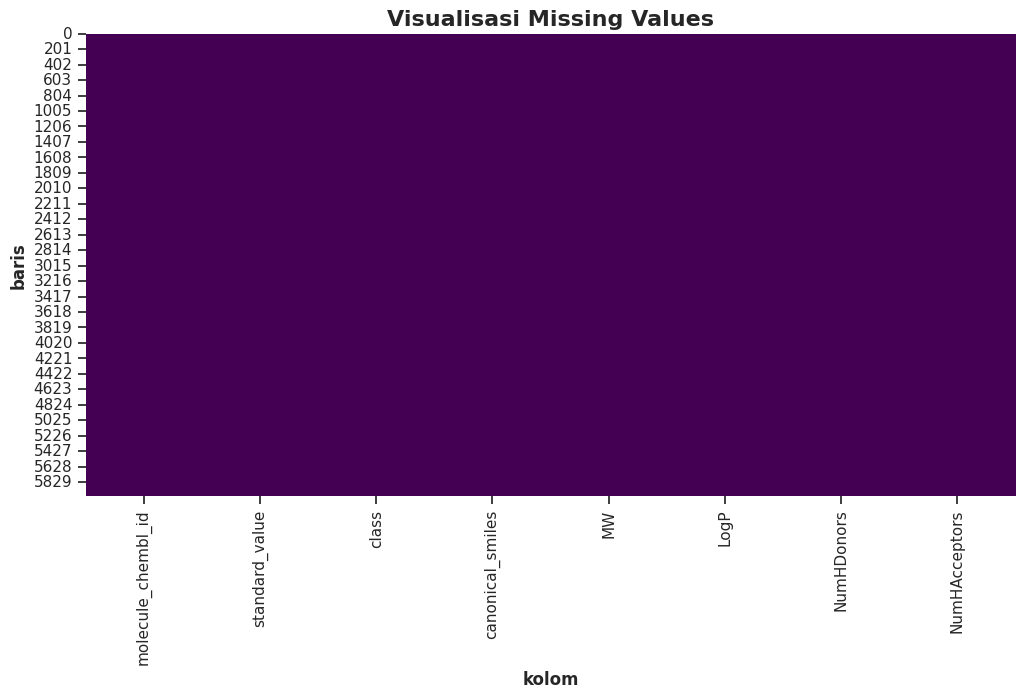

In [ ]:
plot_missing_value(df_combined)

### Konversi IC50 menjadi pIC50

In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1) # Change here

    return x

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1) # Change here

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4448117,intermediate,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@...,2253.82,1.58,31.00,24.00,5.17
1,CHEMBL5078185,intermediate,CC[C@@H](C)[C@@H](NC(=O)[C@@H](CCCNC(=N)N)NC(=...,2350.99,1.85,35.00,24.00,5.80
2,CHEMBL3260567,active,Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1,399.43,4.24,2.00,6.00,7.89
3,CHEMBL5272606,active,Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CC...,369.43,3.51,1.00,5.00,7.25
4,CHEMBL5280211,active,CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn...,433.56,5.74,1.00,7.00,7.42
...,...,...,...,...,...,...,...,...
6001,CHEMBL5404411,intermediate,COc1ccc(Cc2nnc(N3CCN(C(=O)c4ccccc4)CC3)c3ccccc...,438.53,4.19,0.00,5.00,5.81
6002,CHEMBL2165191,inactive,Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)c...,408.46,2.71,2.00,7.00,3.59
6003,CHEMBL1852688,inactive,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,560.49,5.35,2.00,8.00,5.00
6004,CHEMBL3643413,inactive,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,450.47,2.88,1.00,7.00,5.00


### Menghapus kelas 'intermediet class'

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL3260567,active,Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1,399.43,4.24,2.00,6.00,7.89
3,CHEMBL5272606,active,Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CC...,369.43,3.51,1.00,5.00,7.25
4,CHEMBL5280211,active,CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn...,433.56,5.74,1.00,7.00,7.42
5,CHEMBL2364611,active,Cc1cccc(-c2nn3c(c2-c2ccnc4ccc(C(N)=O)cc24)CCC3)n1,369.43,3.51,1.00,5.00,7.25
6,CHEMBL5279930,active,O=c1[nH]cc(-c2cccc(CO)c2)cc1-c1nc2cc(N3CCNCC3)...,401.47,2.49,4.00,5.00,6.01
...,...,...,...,...,...,...,...,...
5987,CHEMBL5440832,active,COc1ccc(Cc2nnc(N3CCN(C(=O)Nc4ccc(OC)cc4)CC3)c3...,483.57,4.59,1.00,6.00,6.06
6002,CHEMBL2165191,inactive,Cc1cc([C@@H](C)Nc2ccccc2C(=O)O)c2nc(N3CCOCC3)c...,408.46,2.71,2.00,7.00,3.59
6003,CHEMBL1852688,inactive,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,560.49,5.35,2.00,8.00,5.00
6004,CHEMBL3643413,inactive,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,450.47,2.88,1.00,7.00,5.00


In [ ]:
df_2class.isna().sum()

,0
molecule_chembl_id,0
class,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
pIC50,0


In [ ]:
df_2class.to_csv('01_label2class_TGF-beta.csv', index=False)

In [ ]:
df_2class.shape

(4958, 8)

### Visualisasi Molekul Canonical Smiles

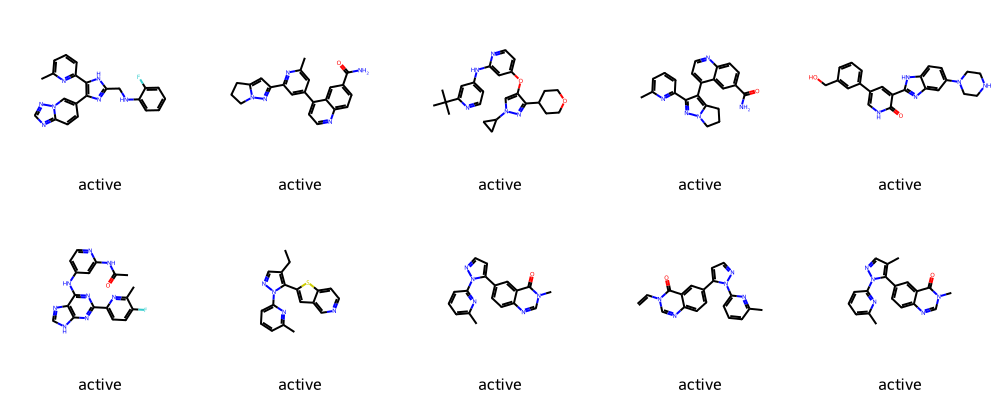

In [ ]:
# Membaca dataset
df_viz = pd.read_csv('01_label2class_TGF-beta.csv')

# Membaca SMILES dan mengonversinya ke molekul
smiles = df_viz['canonical_smiles'].apply(Chem.MolFromSmiles)

# Ambil 10 molekul pertama
mols = smiles[:10]

# Membuat gambar molekul dengan label
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200),
                           legends=[f"{label}" for label in df_viz['class'].iloc[:10]])

img


## 1.5 PLOTTING

Plot frekuensi dari dua kelas bioaktifitas

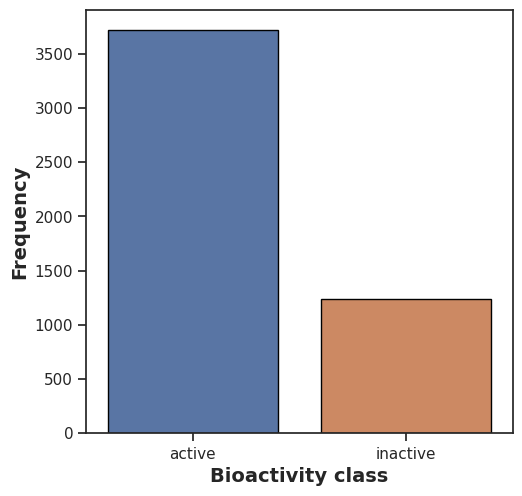

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot MW vs LogP

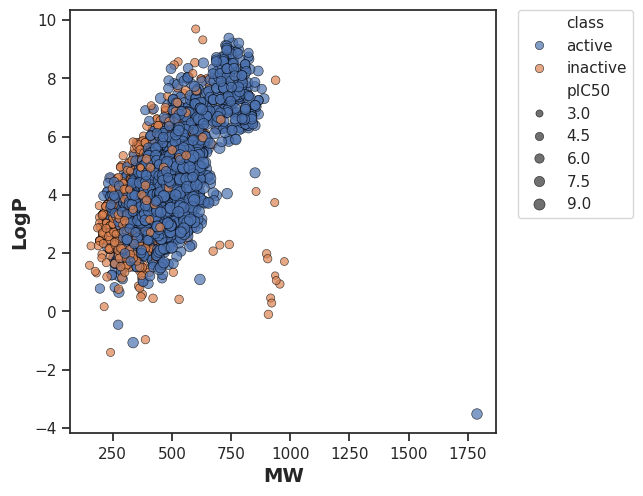

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### pIC50 Value Boxplots

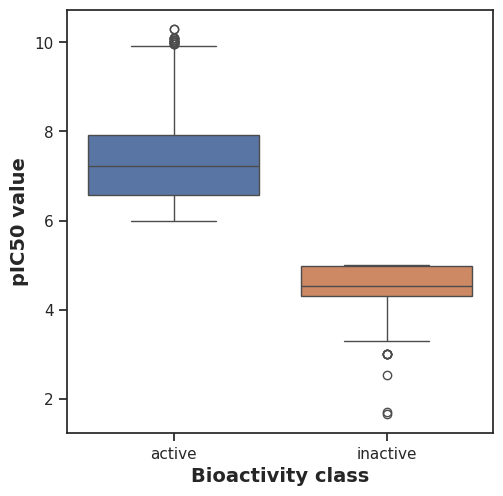

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

## 1.6 Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4605360.00,0.00,0.05,Different distribution (reject H0)


### MW

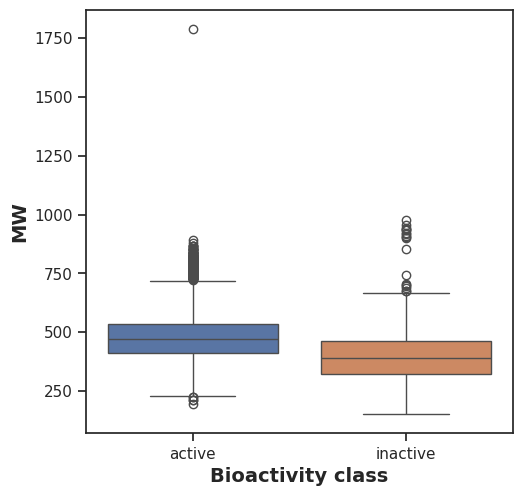

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3285815.50,0.00,0.05,Different distribution (reject H0)


### LogP

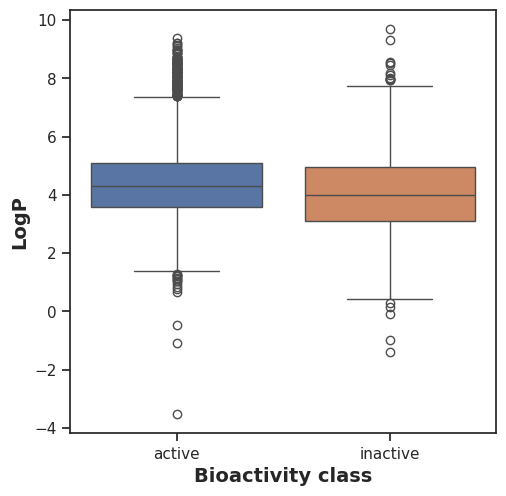

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2653943.00,0.00,0.05,Different distribution (reject H0)


### NumHDonors

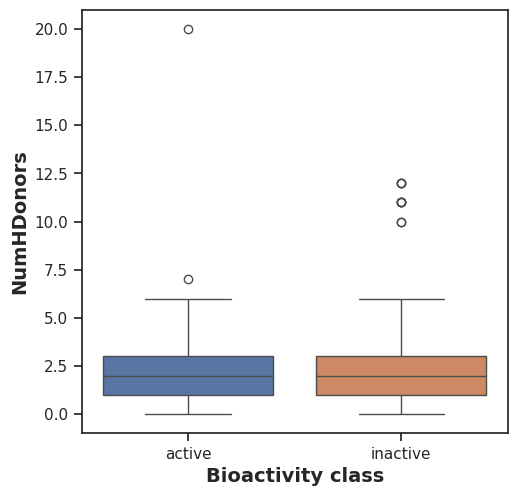

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2547639.00,0.00,0.05,Different distribution (reject H0)


### NumHAcceptors

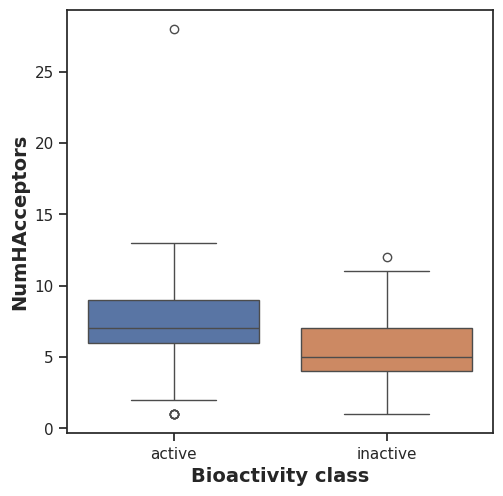

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3416916.00,0.00,0.05,Different distribution (reject H0)


# **02 - Fingerprint Generation**

## 2.1 Padel Descriptor

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_2class[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1	CHEMBL3260567
Cc1cc(-c2ccnc3ccc(C(N)=O)cc23)cc(-c2cc3n(n2)CCC3)n1	CHEMBL5272606
CC(C)(C)c1cc(Nc2cc(Oc3cn(C4CC4)nc3C3CCOCC3)ccn2)ccn1	CHEMBL5280211
Cc1cccc(-c2nn3c(c2-c2ccnc4ccc(C(N)=O)cc24)CCC3)n1	CHEMBL2364611
O=c1[nH]cc(-c2cccc(CO)c2)cc1-c1nc2cc(N3CCNCC3)ccc2[nH]1	CHEMBL5279930


In [ ]:
! cat molecule.smi | wc -l

4958


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL5272606 in molecule.smi (2/4958). 
Processing CHEMBL3260567 in molecule.smi (1/4958). 
Processing CHEMBL5280211 in molecule.smi (3/4958). Average speed: 11.17 s/mol.
Processing CHEMBL2364611 in molecule.smi (4/4958). Average speed: 5.74 s/mol.
Processing CHEMBL5279930 in molecule.smi (5/4958). Average speed: 5.97 s/mol.
Processing CHEMBL5288544 in molecule.smi (6/4958). Average speed: 3.09 s/mol.
Processing CHEMBL3704651 in molecule.smi (7/4958). Average speed: 2.57 s/mol.
Processing CHEMBL2024684 in molecule.smi (8/4958). Average speed: 2.14 s/mol.
Processing CHEMBL2024685 in molecule.smi (9/4958). Average speed: 1.90 s/mol.
Processing CHEMBL2024686 in molecule.smi (10/4958). Average speed: 1.67 s/mol.
Processing CHEMBL2024687 in molecule.smi (11/4958). Average speed: 1.53 s/mol.
Processing CHEMBL2024689 in molecule.smi (13/4958). Average speed: 1.29 s/mol.
Processing CHEMBL2024688 in molecule.smi (12/4958). Average speed: 1.40 s/mol.
Processing CHEMBL2024690 in molec

## 2.2 Menggabungkan Fingerprint dan dataframe class

In [ ]:
df_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4954,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4955,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4956,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_2class_prep = pd.read_csv('01_label2class_TGF-beta.csv')

In [ ]:
selection1= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'class']
df_Y = df_2class_prep [selection1]
df_Y

,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,7.89,399.43,4.24,2.00,6.00,active
1,7.25,369.43,3.51,1.00,5.00,active
2,7.42,433.56,5.74,1.00,7.00,active
3,7.25,369.43,3.51,1.00,5.00,active
4,6.01,401.47,2.49,4.00,5.00,active
...,...,...,...,...,...,...
4953,6.06,483.57,4.59,1.00,6.00,active
4954,3.59,408.46,2.71,2.00,7.00,inactive
4955,5.00,560.49,5.35,2.00,8.00,inactive
4956,5.00,450.47,2.88,1.00,7.00,inactive


In [ ]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,7.89,399.43,4.24,2.00,6.00,active
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,7.25,369.43,3.51,1.00,5.00,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,7.42,433.56,5.74,1.00,7.00,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,7.25,369.43,3.51,1.00,5.00,active
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,6.01,401.47,2.49,4.00,5.00,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,6.06,483.57,4.59,1.00,6.00,active
4954,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,3.59,408.46,2.71,2.00,7.00,inactive
4955,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,5.00,560.49,5.35,2.00,8.00,inactive
4956,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,5.00,450.47,2.88,1.00,7.00,inactive


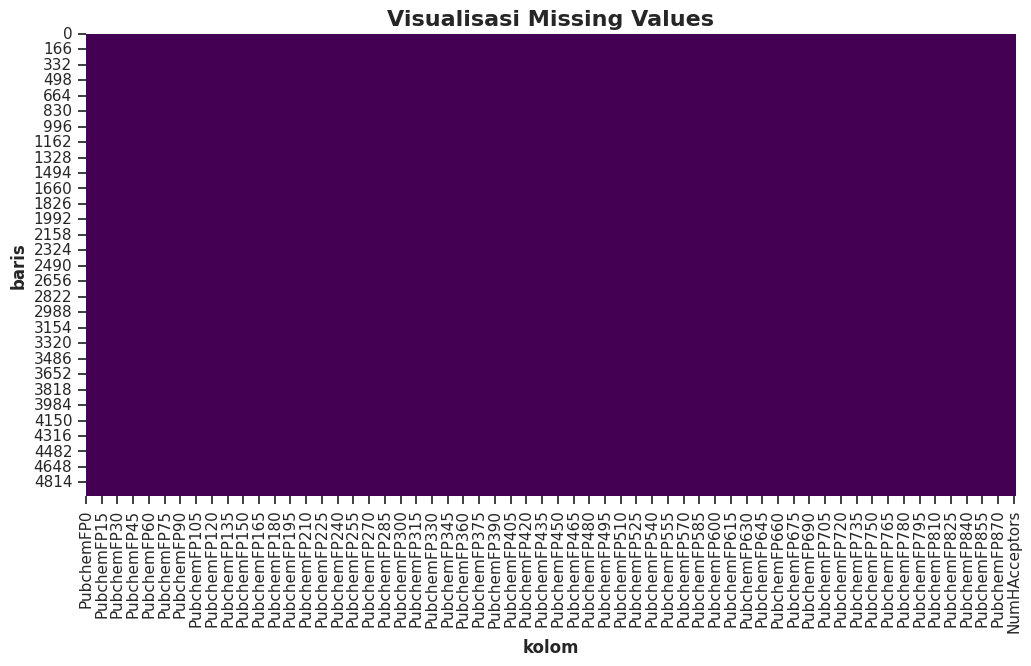

In [ ]:
plot_missing_value(dataset)

In [ ]:
dataset.isna().sum()

,0
PubchemFP0,0
PubchemFP1,0
PubchemFP2,0
PubchemFP3,0
PubchemFP4,0
...,...
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0


## 2.3 Mengecek low variance

In [ ]:
selection2= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'class']
lipinski = dataset [selection2]
lipinski.head()

,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,7.89,399.43,4.24,2.00,6.00,active
1,7.25,369.43,3.51,1.00,5.00,active
2,7.42,433.56,5.74,1.00,7.00,active
3,7.25,369.43,3.51,1.00,5.00,active
4,6.01,401.47,2.49,4.00,5.00,active


In [ ]:
variance = dataset.drop(columns= ['pIC50',  'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'class'], axis=1)
variance.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance = selection.fit_transform(variance)
variance = pd.DataFrame(variance)
variance.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
141,0
142,0
143,0
144,0


In [ ]:
variance.columns = variance.columns.astype(str)

In [ ]:
fix = pd.concat([variance,lipinski], axis=1)
fix

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,0,0,1,0,1,1,1,1,1,1,...,0,0,0,0,7.89,399.43,4.24,2.00,6.00,active
1,0,0,0,0,1,1,1,1,1,1,...,0,0,0,1,7.25,369.43,3.51,1.00,5.00,active
2,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,7.42,433.56,5.74,1.00,7.00,active
3,0,0,0,0,1,1,1,1,1,1,...,0,0,0,1,7.25,369.43,3.51,1.00,5.00,active
4,0,1,0,0,1,1,1,0,0,0,...,0,0,1,0,6.01,401.47,2.49,4.00,5.00,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,6.06,483.57,4.59,1.00,6.00,active
4954,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,3.59,408.46,2.71,2.00,7.00,inactive
4955,0,1,1,0,1,1,1,0,0,0,...,0,0,0,0,5.00,560.49,5.35,2.00,8.00,inactive
4956,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,5.00,450.47,2.88,1.00,7.00,inactive


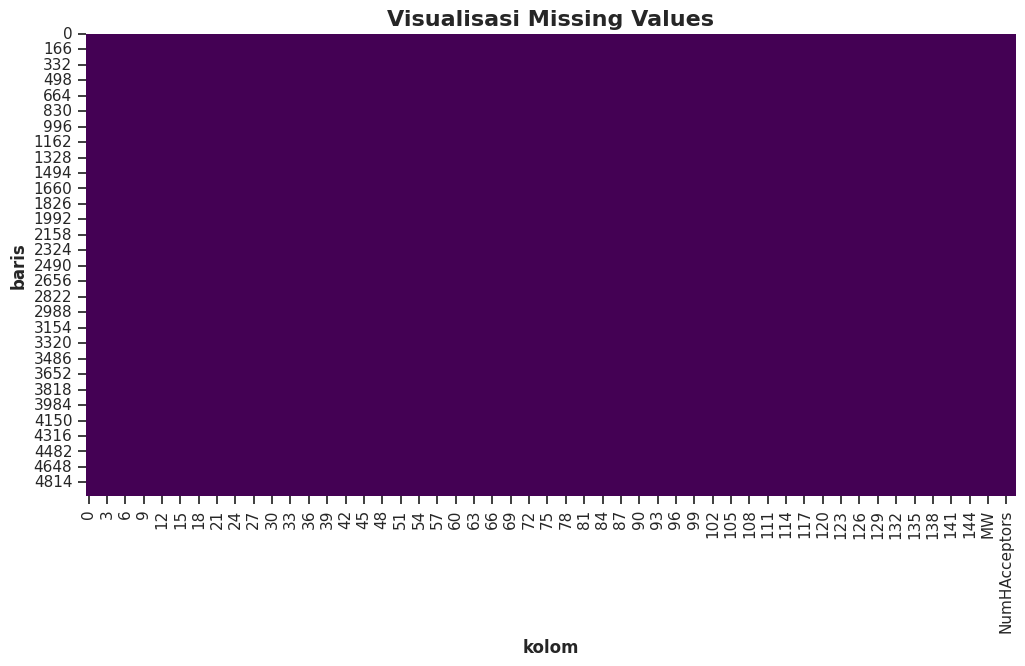

In [ ]:
plot_missing_value(fix)

In [ ]:
fix=fix.dropna()
fix

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,0,0,1,0,1,1,1,1,1,1,...,0,0,0,0,7.89,399.43,4.24,2.00,6.00,active
1,0,0,0,0,1,1,1,1,1,1,...,0,0,0,1,7.25,369.43,3.51,1.00,5.00,active
2,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,7.42,433.56,5.74,1.00,7.00,active
3,0,0,0,0,1,1,1,1,1,1,...,0,0,0,1,7.25,369.43,3.51,1.00,5.00,active
4,0,1,0,0,1,1,1,0,0,0,...,0,0,1,0,6.01,401.47,2.49,4.00,5.00,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,6.06,483.57,4.59,1.00,6.00,active
4954,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,3.59,408.46,2.71,2.00,7.00,inactive
4955,0,1,1,0,1,1,1,0,0,0,...,0,0,0,0,5.00,560.49,5.35,2.00,8.00,inactive
4956,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,5.00,450.47,2.88,1.00,7.00,inactive


In [ ]:
mapping = {'active': 0, 'inactive': 1, 'intermediate': 2}
fix['class_numeric'] = fix['class'].map(mapping)
fix

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class,class_numeric
0,0,0,1,0,1,1,1,1,1,1,...,0,0,0,7.89,399.43,4.24,2.00,6.00,active,0
1,0,0,0,0,1,1,1,1,1,1,...,0,0,1,7.25,369.43,3.51,1.00,5.00,active,0
2,0,1,0,0,1,1,1,0,0,0,...,0,0,0,7.42,433.56,5.74,1.00,7.00,active,0
3,0,0,0,0,1,1,1,1,1,1,...,0,0,1,7.25,369.43,3.51,1.00,5.00,active,0
4,0,1,0,0,1,1,1,0,0,0,...,0,1,0,6.01,401.47,2.49,4.00,5.00,active,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,0,1,0,0,0,0,0,0,0,0,...,0,0,1,6.06,483.57,4.59,1.00,6.00,active,0
4954,0,1,0,0,0,0,0,0,0,0,...,0,0,0,3.59,408.46,2.71,2.00,7.00,inactive,1
4955,0,1,1,0,1,1,1,0,0,0,...,0,0,0,5.00,560.49,5.35,2.00,8.00,inactive,1
4956,0,1,0,1,0,0,0,0,0,0,...,1,0,0,5.00,450.47,2.88,1.00,7.00,inactive,1


In [ ]:
fix.to_csv('02_dataset_model_TGF-beta.csv', index=False)

# 03 - Lazy Classifier

In [ ]:
fix = pd.read_csv('02_dataset_model_TGF-beta.csv')
fix

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class,class_numeric
0,0,0,1,0,1,1,1,1,1,1,...,0,0,0,7.89,399.43,4.24,2.00,6.00,active,0
1,0,0,0,0,1,1,1,1,1,1,...,0,0,1,7.25,369.43,3.51,1.00,5.00,active,0
2,0,1,0,0,1,1,1,0,0,0,...,0,0,0,7.42,433.56,5.74,1.00,7.00,active,0
3,0,0,0,0,1,1,1,1,1,1,...,0,0,1,7.25,369.43,3.51,1.00,5.00,active,0
4,0,1,0,0,1,1,1,0,0,0,...,0,1,0,6.01,401.47,2.49,4.00,5.00,active,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,0,1,0,0,0,0,0,0,0,0,...,0,0,1,6.06,483.57,4.59,1.00,6.00,active,0
4954,0,1,0,0,0,0,0,0,0,0,...,0,0,0,3.59,408.46,2.71,2.00,7.00,inactive,1
4955,0,1,1,0,1,1,1,0,0,0,...,0,0,0,5.00,560.49,5.35,2.00,8.00,inactive,1
4956,0,1,0,1,0,0,0,0,0,0,...,1,0,0,5.00,450.47,2.88,1.00,7.00,inactive,1


In [ ]:
X = fix.drop(columns=["class_numeric", "class", "pIC50"])
y = fix.class_numeric

X

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,MW,LogP,NumHDonors,NumHAcceptors
0,0,0,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,399.43,4.24,2.00,6.00
1,0,0,0,0,1,1,1,1,1,1,...,1,0,0,0,0,1,369.43,3.51,1.00,5.00
2,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,433.56,5.74,1.00,7.00
3,0,0,0,0,1,1,1,1,1,1,...,1,0,0,0,0,1,369.43,3.51,1.00,5.00
4,0,1,0,0,1,1,1,0,0,0,...,1,0,0,0,1,0,401.47,2.49,4.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,483.57,4.59,1.00,6.00
4954,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,408.46,2.71,2.00,7.00
4955,0,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,560.49,5.35,2.00,8.00
4956,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,450.47,2.88,1.00,7.00


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4958, 150)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train

,class_numeric
3882,0
874,1
1814,1
1830,1
982,0
...,...
121,1
3407,1
811,1
3160,0


In [ ]:
lazyc = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Latih model dan evaluasi dengan data uji
model_train, prediction_train = lazyc.fit(X_train, X_train, y_train, y_train)
model_test, prediction_test = lazyc.fit(X_train, X_test, y_train, y_test)

# Lihat hasil prediksi pada data uji
#print(prediction_test)


 97%|█████████▋| 31/32 [00:14<00:00,  1.42it/s]

[LightGBM] [Info] Number of positive: 990, number of negative: 2976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 3966, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249622 -> initscore=-1.100630
[LightGBM] [Info] Start training from score -1.100630


100%|██████████| 32/32 [00:15<00:00,  2.05it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 31/32 [00:12<00:00,  2.75it/s]

[LightGBM] [Info] Number of positive: 990, number of negative: 2976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 3966, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249622 -> initscore=-1.100630
[LightGBM] [Info] Start training from score -1.100630


100%|██████████| 32/32 [00:12<00:00,  2.50it/s]


In [ ]:
prediction_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,1.00,1.00,0.66
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.73
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.04
LabelPropagation,1.00,1.00,1.00,1.00,0.83
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.13
LabelSpreading,1.00,1.00,1.00,1.00,1.09
BaggingClassifier,0.99,0.99,0.99,0.99,0.48
LGBMClassifier,0.98,0.96,0.96,0.98,0.78
KNeighborsClassifier,0.91,0.86,0.86,0.91,0.20


In [ ]:
prediction_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.88,0.83,0.83,0.88,0.35
ExtraTreesClassifier,0.89,0.83,0.83,0.89,0.68
RandomForestClassifier,0.89,0.83,0.83,0.89,0.84
DecisionTreeClassifier,0.86,0.81,0.81,0.86,0.12
ExtraTreeClassifier,0.86,0.80,0.80,0.86,0.04
BaggingClassifier,0.86,0.79,0.79,0.86,0.71
KNeighborsClassifier,0.86,0.79,0.79,0.86,0.07
SVC,0.87,0.78,0.78,0.87,1.56
LabelSpreading,0.87,0.78,0.78,0.86,0.83


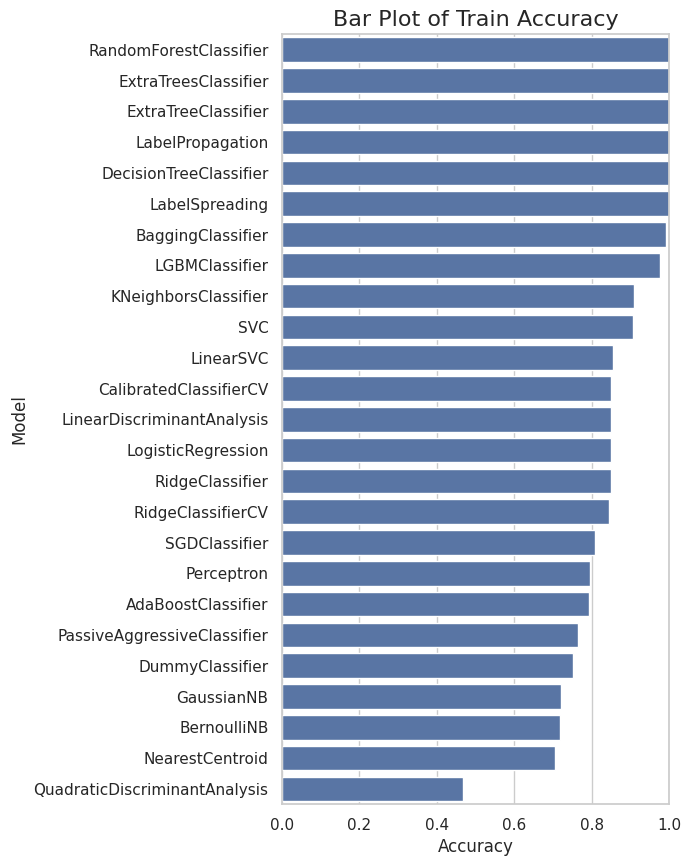

In [ ]:
# Bar plot of Accuracy train
import matplotlib.pyplot as plt
import seaborn as sns

# Urutkan data berdasarkan kolom "Accuracy" secara menurun
prediction_train_sorted = prediction_train.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=prediction_train_sorted.index, x="Accuracy", data=prediction_train_sorted)
ax.set(xlim=(0, 1))
ax.set_title("Bar Plot of Train Accuracy", fontsize=16)
plt.show()

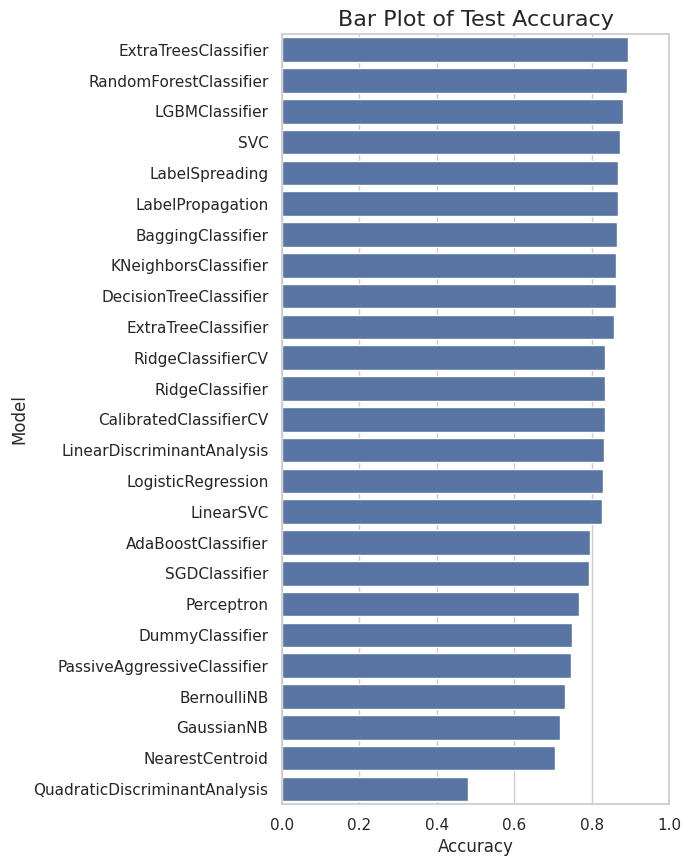

In [ ]:
# Bar plot of Accuracy test (sorted)
prediction_test_sorted = prediction_test.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=prediction_test_sorted.index, x="Accuracy", data=prediction_test_sorted)
ax.set(xlim=(0, 1))
ax.set_title("Bar Plot of Test Accuracy", fontsize=16)
plt.show()

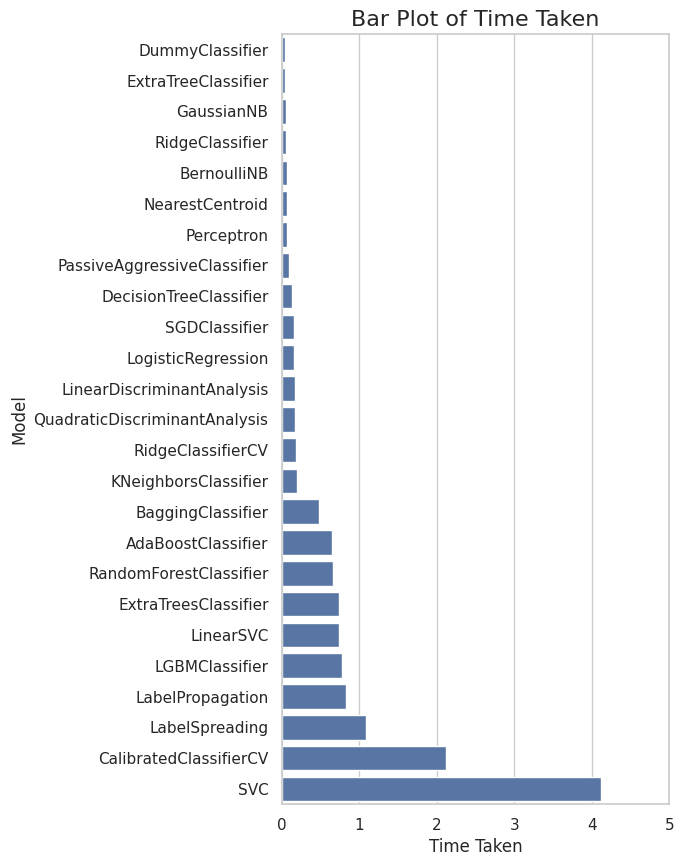

In [ ]:
# Bar plot of calculation time (sorted)
# Urutkan data berdasarkan "Time Taken" untuk prediction_train
prediction_train_sorted = prediction_train.sort_values(by="Time Taken", ascending=True)

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=prediction_train_sorted.index, x="Time Taken", data=prediction_train_sorted)
ax.set(xlim=(0, 5))
ax.set_title("Bar Plot of Time Taken", fontsize=16)
plt.show()

# 04 - Random Forest Classifier

Dengan Gridsearch

In [ ]:
# dataset splitting
df = pd.read_csv('02_dataset_model_TGF-beta.csv')
X = df.drop(columns=["class_numeric", "class", "pIC50"])
y = df.class_numeric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3966, 150), (992, 150), (3966,), (992,))

In [ ]:
# preprocessor
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordinal_encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

numeric = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
categoric = [col for col in X_train.columns if col not in numeric]

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, numeric),
    ("categoric", categorical_pipeline, categoric)
])

# pipeline
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier(random_state=42))
])

In [ ]:
# parameter tuning
parameter = {
    "algo__n_estimators": [100, 200],
    "algo__max_depth": [10, 20, None],
    "algo__min_samples_split": [5, 10, 15],
    "algo__min_samples_leaf": [1, 2, 5, 10],
    "algo__bootstrap": [True, False]
}


model = GridSearchCV(pipeline, param_grid=parameter, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['MW',
                                                                          'LogP',
                                                                          'NumHDonors',
                                                                          'NumHAcceptors']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal_encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_enco...
                                                                          '11',
                                                                          '12',
                                                                          '13',
                                                                          '14',
                                                                          '15',
                                                                          '16',
                                                                          '17',
                                                                          '18',
                                                                          '19',
                                                                          '20',
                                                                          '21',
                                                                          '22',
                                                                          '23',
                                                                          '24',
                                                                          '25',
                                                                          '26',
                                                                          '27',
                                                                          '28',
                                                                          '29', ...])])),
                                       ('algo',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'algo__bootstrap': [True, False],
                         'algo__max_depth': [10, 20, None],
                         'algo__min_samples_leaf': [1, 2, 5, 10],
                         'algo__min_samples_split': [5, 10, 15],
                         'algo__n_estimators': [100, 200]},
             verbose=1)

In [ ]:
# evaluation
print("Best Parameters\t\t:", model.best_params_)
print("Training Accuracy\t:", model.score(X_train, y_train))
print("Best CV Score\t\t:", model.best_score_)
print("Test Accuracy\t\t:", model.score(X_test, y_test))

Best Parameters		: {'algo__bootstrap': False, 'algo__max_depth': None, 'algo__min_samples_leaf': 1, 'algo__min_samples_split': 5, 'algo__n_estimators': 200}
Training Accuracy	: 0.9969742813918305
Best CV Score		: 0.8865377468466207
Test Accuracy		: 0.8971774193548387


Evaluasi Model


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       744
           1       0.85      0.71      0.78       248

    accuracy                           0.90       992
   macro avg       0.88      0.84      0.85       992
weighted avg       0.89      0.90      0.89       992



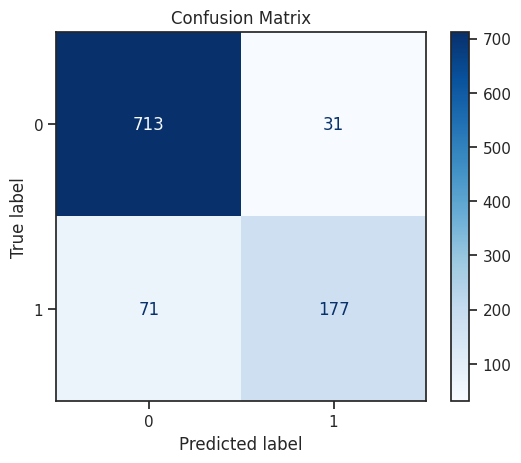

In [ ]:
# Classification Report
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()



In [ ]:
# Contoh Prediksi Klasifikasi
sample_data = X_test.sample(10, random_state=42)  # Ambil 10 sampel data dari X_test
sample_true_labels = y_test.loc[sample_data.index]  # Ambil label asli dari sampel
sample_predictions = model.predict(sample_data)  # Prediksi kelas untuk sampel

# Tampilkan hasil prediksi
print("Contoh Prediksi Klasifikasi:")
for idx, (true_label, pred_label) in zip(sample_data.index, zip(sample_true_labels, sample_predictions)):
    print(f"Index {idx}\t: Kelas Asli = {true_label}, Prediksi = {pred_label}")


Contoh Prediksi Klasifikasi:
Index 3827	: Kelas Asli = 0, Prediksi = 0
Index 3124	: Kelas Asli = 1, Prediksi = 1
Index 1035	: Kelas Asli = 1, Prediksi = 0
Index 816	: Kelas Asli = 1, Prediksi = 1
Index 2552	: Kelas Asli = 1, Prediksi = 0
Index 2689	: Kelas Asli = 0, Prediksi = 0
Index 4703	: Kelas Asli = 0, Prediksi = 0
Index 2166	: Kelas Asli = 0, Prediksi = 0
Index 1901	: Kelas Asli = 0, Prediksi = 0
Index 4721	: Kelas Asli = 0, Prediksi = 0


In [ ]:
import pickle

# Menyimpan model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Memuat kembali model
with open("random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Verifikasi model setelah memuat
print("Loaded Model Test Accuracy:", loaded_model.score(X_test, y_test))


Loaded Model Test Accuracy: 0.8971774193548387


### 4.1 Best Model Random Forest Classifier

In [ ]:
# Set seed
np.random.seed(100)

# Dataset splitting
df = pd.read_csv('02_dataset_model_TGF-beta.csv')
X = df.drop(columns=["class_numeric", "class", "pIC50"])
y = df.class_numeric

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model with best parameters
best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

model = RandomForestClassifier(**best_params, random_state=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=200,
                       random_state=100)

Training Accuracy: 0.9964699949571356
Test Accuracy: 0.8951612903225806

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       744
           1       0.84      0.72      0.77       248

    accuracy                           0.90       992
   macro avg       0.87      0.84      0.85       992
weighted avg       0.89      0.90      0.89       992



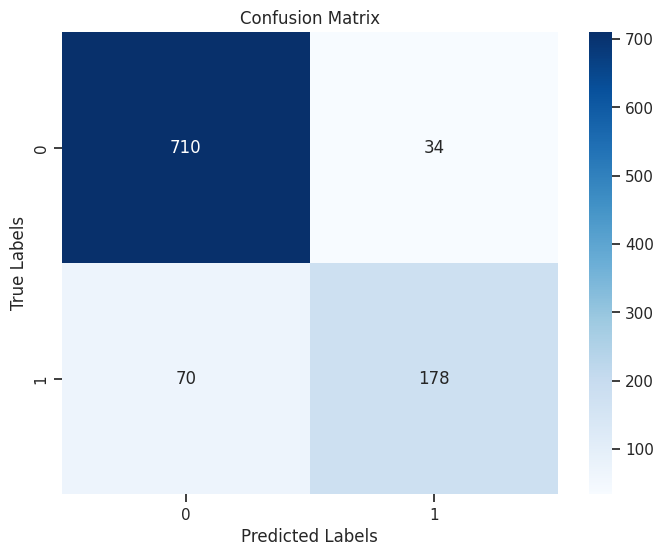

In [ ]:
# Evaluasi Train
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:}")

# Evaluasi Test
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:}")

# Prediction
y_pred = model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()